In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import time
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import pandas as pd

In [2]:
cp=input("press 0 for put and 1 for call ")
strike=input("enter strike price ")
a_array=[]
b_array=[]
c_array=[]
x = []

press 0 for put and 1 for call 1
enter strike price 7000


/home/kajal/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


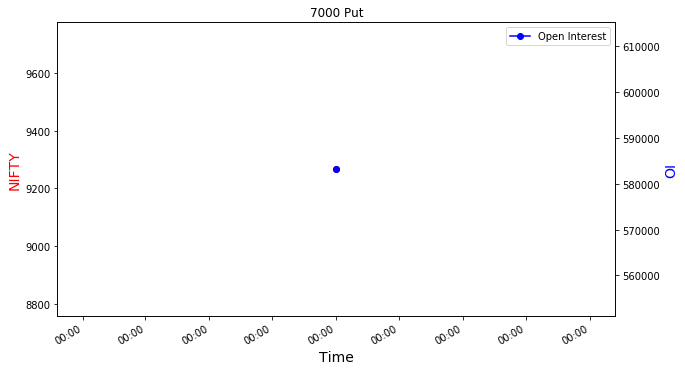

KeyboardInterrupt: 

In [3]:
url='https://www1.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionDates.jsp?symbol=NIFTY&instrument=OPTIDX&strike='+str(strike)+'.00'
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36'}

str = str(strike)

if(cp==1):
        str = str + ' Call'
else:
        str = str + ' Put'


while(True):
    response = requests.get(url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    
    a=soup.find(id="wrapper_btm").findAll('tr')[0].findAll('td')[1].findAll('span')[0].findAll('b')[0].getText()
    a=float(a[6:])
    a_array.append(a)

    if cp==0:
        b=soup.find(id="octable").findAll('tr')[3].findAll('td')[21].getText()
        b=float(b.replace(',',''))
        b_array.append(b)
    else:
        b=soup.find(id="octable").findAll('tr')[3].findAll('td')[1].getText()
        b=float(b.replace(',',''))
        b_array.append(b)
    
    c=soup.find(id="wrapper_btm").findAll('tr')[0].findAll('td')[1].findAll('span')[1].getText()
    c=c[19:27]
    c=datetime.strptime(c,'%H:%M:%S')
    
    c_array.append(c)
    
    
    #print(" ")
    #print("NIFTY ", a_array)
    #print("OI    ",b_array)
    #print(c_array)
    

    
    fig,ax = plt.subplots(figsize=(10, 6))
    ax.plot(c_array, a_array, color="red", marker="o", label='Nifty')
    ax.set_xlabel("Time",fontsize=14)

    ax.set_ylabel("NIFTY",fontsize=14, color='red')
    ax2=ax.twinx()

    
    ax2.plot(c_array, b_array,color="blue",marker="o", label='Open Interest')
    ax2.set_ylabel("OI",fontsize=14, color='blue')
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.legend()
    plt.title(str)
    plt.show()
    
    #break
    
    time.sleep(180)
    
    


In [69]:
li = [a_array, b_array, c_array]

In [70]:
df = pd.DataFrame(li)
df = df.transpose()
df.columns = ["NIFTY", "OI", "TIME"]
df.to_excel('output.xls')

In [71]:
df

,NIFTY,OI,TIME
0,8992.8,158025,1900-01-01 15:30:30
